# **AdaBoost**

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org




# **Índice**

---

> [AdaBoost](#scrollTo=xj3Td2DKv3sQ)
<br>
>>
>> [1 - Introducción a AdaBoost](#scrollTo=UIJgdTfzv5OW) 
>>
>> [2 - Construcción del Modelo](#scrollTo=Eu_hXazuv5Rv)
>>> [2.1. *Stumps* (tocones)](#scrollTo=tx0kzfXbaP7F) \\
>>> [2.2. Tasa de Aprendizaje](#scrollTo=gAUy_8Dm6sIC) 
>>
>> [3 - AdaBoost *vs.* Gradient Boosting](#scrollTo=duwn7v_dw73X) 
>>
>> [4 - Ventajas y Desventajas](#scrollTo=TOydZ4MezM_S)
>>
>> [Actividad: Estimación de Precios de Viviendas en California](#scrollTo=v9fzV7rHBgSB)
>>> [Solución](#scrollTo=m7KxQ7QYQMT_)
>>
>> [IDEAS CLAVE](#scrollTo=mRhjhWdTzFqZ)

<br>

< [Gradient Boosting]() | 
[Siguiente Tema]() >

# **1. Introducción a AdaBoost**

*AdaBoost* (*Adaptive Boosting*) es uno de los algoritmos ensamblados más populares en el campo del aprendizaje automático. Fue propuesto por primera vez por Yoav Freund y Robert Schapire en 1996 y se ha convertido en un algoritmo ampliamente utilizado en la práctica debido a su eficacia y flexibilidad.

El principio detrás de *AdaBoost* es simple pero poderoso. El algoritmo ajusta de forma iterativa una serie de modelos base, generalmente árboles de decisión simples, a partir de un conjunto de datos de entrenamiento. Cada modelo base se ajusta a los datos de entrenamiento ponderados, donde las instancias mal clasificadas en las iteraciones anteriores se ponderan más para que se les dé mayor importancia en las siguientes iteraciones. De esta manera, *AdaBoost* se adapta para poner más énfasis en las instancias difíciles de clasificar y mejorar su rendimiento en ellas.

El proceso de entrenamiento de *AdaBoost* implica asignar pesos a las instancias de entrenamiento y ajustar los modelos base en función de estos pesos. Luego, se combinan las predicciones de los modelos base ponderadas por su rendimiento y se actualizan los pesos de las instancias para la siguiente iteración. Este proceso se repite durante un número predeterminado de iteraciones o hasta que se alcance un criterio de parada predefinido. La siguiente imagen refleja este proceso de manera visual:

![GB](https://upload.wikimedia.org/wikipedia/commons/b/b5/Ensemble_Boosting.svg)

<small>FUENTE: en.wikipedia.org</small>

Una de las ventajas de *AdaBoost* es que es un algoritmo adaptativo, lo que significa que es capaz de ajustarse a datos difíciles de clasificar a medida que avanza el proceso de entrenamiento. Además, *AdaBoost* tiende a ser menos propenso al sobreajuste en comparación con los modelos base individuales, lo que lo hace más robusto y generalizable.

<br/>
<p><mark>RECUERDA</mark></p>
<hr/>

En *Boosting* se van a lanzar los árboles de decisión en serie, tratando siempre de mejorar el ajuste del modelo a los datos de entrenamiento. Estos algoritmos ensamblan otros algoritmos más sencillos, generalmente árboles de decisión, pero se podrían utilizar otros.






# **2. Construcción del modelo**

La construcción de un modelo AdaBoost consta de varias fases, algunas de ellas comunes a otros algoritmos de aprendizaje, que se describen a continuación:

1. **Preparación de los datos**: En esta fase, se realiza la preparación del conjunto de datos de entrenamiento. Esto implica la limpieza y transformación de los datos, así como la selección de características relevantes para el problema de clasificación. En esta fase se divide el conjunto de datos en entrenamiento y evaluación.

2. **Selección de un modelo base**: Se selecciona un modelo base (también conocido como clasificador débil o *weak*) que se utilizará como componente básico del ensamble en *AdaBoost*. Puede ser cualquier algoritmo de clasificación que tenga un rendimiento ligeramente mejor que el azar, como árboles de decisión simples, regresión logística o SVM lineal.

3. **Entrenamiento del modelo base**: Se entrena el modelo base utilizando el conjunto de datos de entrenamiento. Esto implica ajustar los hiperparámetros del modelo base y ajustarlo a los datos de entrenamiento para obtener un clasificador débil. Utilizando árboles de decisión como modelos base, se construye el primer árbol de decisión ($n=0$) con los datos de entrenamiento, obteniéndose así un primer modelo.

```
tree_model0 = DecisionTreeRegressor o Classifier(max_depth=1)
tree_model0.fit(X_train,y_train)
```

4. **Evaluación del modelo base**: Se evalúa el rendimiento del modelo base en el conjunto de datos de entrenamiento para medir su precisión y error de clasificación. Esto proporciona una base para la construcción del ensamble.

5. **Actualización de los pesos de las instancias**: Cada instancia (fila) tiene un peso (*weight*) asociado. En el primer árbol de decisión ese peso es el mismo para todas las instancias.


$$w_0 = \frac{1}{N}$$

Donde:

> $w_0$: peso inicial (*weight*)

> $N$: número de instancias

Se actualizan los pesos de las instancias del conjunto de datos de entrenamiento. Las instancias clasificadas incorrectamente por el modelo base se ponderan más para darles mayor importancia en la siguiente iteración del proceso de entrenamiento.

Al ser un árbol de decisión tan sencillo tiene algún acierto y bastantes errores de estimación. Los pesos iniciales se actualizan de forma que:

* Los pesos de las filas bien/mejor estimadas van a disminuir su peso.
* Los pesos de las filas mal/peor estimadas van a aumentar su peso.

6. **Construcción del ensamble**: Se construye el ensamble agregando el modelo base entrenado ponderando sus predicciones en función de la precisión obtenida en la evaluación del modelo base y los pesos de las instancias actualizados.

7. **Actualización de los pesos de los clasificadores**: Se actualizan los pesos de los clasificadores del ensamble en función del error de clasificación del ensamble. 

$$w = e * w_0$$

Donde:

> $w_0$: peso actual de las instancias

> $e$: número de errores en la actual iteración

Calculamos la tasa $\alpha$ de actualización como:

$$\alpha = lr*log \frac{1-w}{w} $$

Donde:

> $lr$: **learning_rate**.

> $w$: peso calculado en el paso anterior en función de los errores

Actualizamos los pesos mediante las siguientes fórmulas, dependiendo de si lo estamos haciendo para las instancias correctas o las incorrectas.

* Para las instancias incorrectas:

$$w_{i} = w_i * e^{\alpha}$$

* Para las instancias correctas:

$$w_{i} = w_i * e^{-\alpha}$$

Donde

> $w_{i}$: nuevos pesos calculados en la iteración actual

> $w_i$: pesos de la iteración anterior

> $\alpha$: tasa de actualización

Como se puede observar, los clasificadores con menor error de clasificación obtienen mayor peso en el ensamble.


8. **Iteración del proceso**: Los pasos 3 a 7 se repiten para un número predeterminado de iteraciones o hasta que se alcance un criterio de parada predefinido, como un umbral de precisión o un número máximo de iteraciones.

9. **Predicción con el modelo**: Una vez que se ha construido el ensamble de clasificadores, se puede utilizar para hacer predicciones en datos no vistos, incluyendo datos de validación o prueba. Para ello, *AdaBoost* calcula las predicciones de todos los árboles de decisión lanzados en serie y las pondera usando el valor de "$\alpha$" calculado anteriormente.

Por ejemplo, si tuviéramos 5 árboles de decisión para los cuales se tienen calculados los diferentes $\alpha$ como:

$$\alpha=[1.38, 0.97, 1.52, 0.74, 1.02]$$

Además, se sabe que las predicciones del ensamblado han sido:

$$pred=[S, NS, S, S, NS]$$

El resultado se calcularía como:

$$S = 1.38 + 1.52 + 0.74 = 3.64$$

y

$$NS = 0.97 + 1.02 = 1.99$$

Con lo que la predicción sería S ya que:

$$w(S)=3.64 > w(NS) = 1.99$$


<br/>
<mark>RECUERDA</mark>
<hr/>

Todos los árboles de decisión que se construyan van a ser de muy pocos niveles de profundidad.



Veámoslo su funcionamiento con un ejemplo en Python. 

Comenzamos preparando el entorno cargando las librerías necesarias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier

Creamos artificialmente un conjunto de observaciones en dos dimensiones y las representamos gráficamente.

Se recomienda jugar con los parámetros *n_samples* y *noise* y observar su efecto en el modelo resultante.

In [ ]:
n_samples = 2000
noise = 0.3

X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
print (X.shape)
print (y.shape)

(2000, 2)
(2000,)


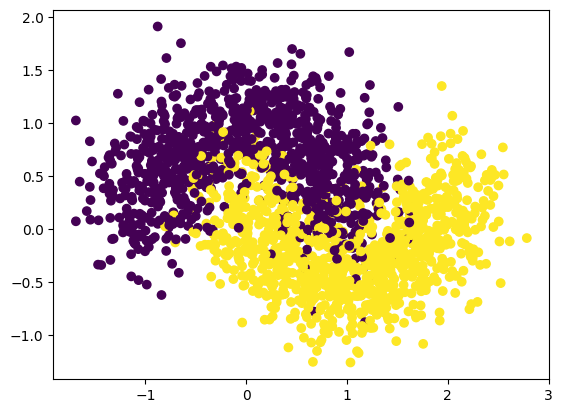

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

Particionamos el conjunto de datos en entrenamiento y evaluación, y sacamos algunas estadísticas del número de elementos por conjunto y clase.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1400, 2) (1400,)
(600, 2) (600,)


In [ ]:
print (sum(y_train==0))
print (sum(y_train==1))
print (sum(y_test==0))
print (sum(y_test==1))

700
700
300
300


Creamos un clasificador basado en *AdaBoost* donde definimos el número de árboles/estimadores (*n_estimators*).

Se recomienda jugar con el parámetro *n_estimators* y observar su efecto en el modelo resultante.

In [ ]:
n_estimators = 10

ada_model = AdaBoostClassifier(random_state=0, n_estimators=n_estimators)
ada_model.fit(X_train, y_train)

pred_train = ada_model.predict(X_train)
pred_test = ada_model.predict(X_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*ada_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*ada_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 90.21
Precisión sobre los datos de test: 90.83


In [ ]:
pred_train

array([0, 1, 1, ..., 1, 1, 1])

Mostramos el grafo asociado a uno de los árboles de decisión (se recomienda variar el parámetro *tree_number* para visualizar otros árboles).

Se puede apreciar la profundidad de los árboles, dando lugar a los denominados *stumps*.

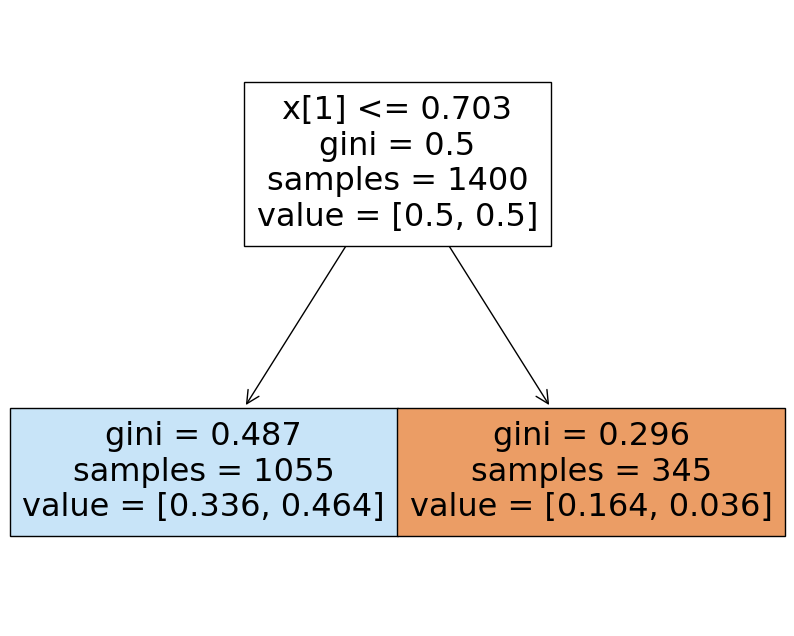

In [ ]:
tree_number = 5

from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(ada_model.estimators_[tree_number], filled=True)
plt.show()

Como se puede observar, los valores de cada nivel suman 1:

In [ ]:
level0Value = ada_model.estimators_[tree_number].tree_.value[0][0,0] + ada_model.estimators_[tree_number].tree_.value[0][0,1] 
level1Value = ada_model.estimators_[tree_number].tree_.value[1][0,0] + ada_model.estimators_[tree_number].tree_.value[1][0,1] + ada_model.estimators_[tree_number].tree_.value[2][0,0] + ada_model.estimators_[tree_number].tree_.value[2][0,1] 

print("Nivel 0 = " + str(round(ada_model.estimators_[tree_number].tree_.value[0][0,0],1)) + " + " + str(round(ada_model.estimators_[tree_number].tree_.value[0][0,1],1)) + " = " + str(round(level0Value,1)))
print("Nivel 1 = " + str(round(ada_model.estimators_[tree_number].tree_.value[1][0,0],3)) + " + " + str(round(ada_model.estimators_[tree_number].tree_.value[1][0,1],3)) + " + " + str(round(ada_model.estimators_[tree_number].tree_.value[2][0,0],3)) + " + " + str(round(ada_model.estimators_[tree_number].tree_.value[2][0,1],3)) + " = " + str(round(level1Value,3)))



Nivel 0 = 0.5 + 0.5 = 1.0
Nivel 1 = 0.336 + 0.464 + 0.164 + 0.036 = 1.0


Visualizamos las fronteras de decisión, tanto sobre el conjunto de entrenamiento como de evaluación:

In [ ]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest, title):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black', alpha=0.5
                )

    plt.suptitle(title)
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

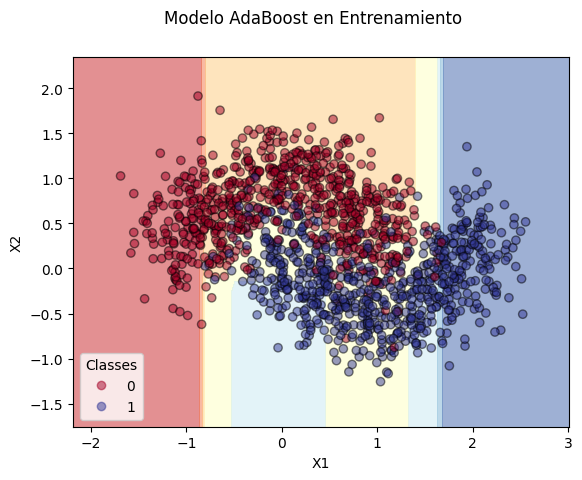

In [ ]:
plot_boundaries_test(X_train, y_train, ada_model, True, X_train, y_train, "Modelo AdaBoost en Entrenamiento")

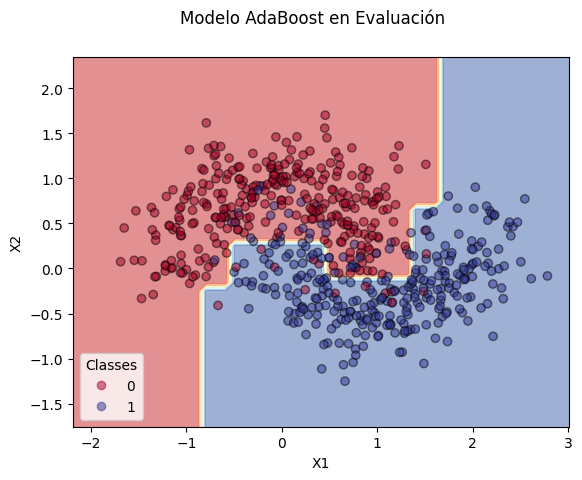

In [ ]:
plot_boundaries_test(X_train, y_train, ada_model, False, X_test, y_test,"Modelo AdaBoost en Evaluación")

## **2.1. *Stumps*** (tocones)

Los clasificadores débiles (*weak*) o modelos base utilizados en AdaBoost para la construcción del ensamblado son extremadamente simples, en la mayoría de los casos árboles de decisión con una sola división, es decir, con una profundidad máxima de 1. Esto es lo que se conocen como *stumps* o tocones.


![tocones](https://www.healthytrees.com/wp-content/uploads/2018/11/November-Blog-2-Tree-Removal-1000x300.jpeg)

<small>FUENTE: https://www.healthytrees.com</small>


El uso de *stumps* en *AdaBoost* es una característica clave de este algoritmo de ensamblado. Aunque los *stumps* son modelos base muy simples y generalmente tienen una precisión baja en la clasificación, suelen ser suficientes para obtener una mejora significativa en la precisión del ensamblado de clasificadores. Esto se debe a que *AdaBoost* se enfoca en ponderar y mejorar las instancias clasificadas incorrectamente en cada iteración del proceso de entrenamiento, lo que permite que los *stumps* contribuyan de manera efectiva a la construcción de un clasificador fuerte.

El uso de *stumps* en *AdaBoost* tiene varias ventajas, como la simplicidad computacional y la capacidad de manejar características irrelevantes o ruido en los datos. Sin embargo, también puede tener algunas limitaciones, como una mayor susceptibilidad al sobreajuste y una posible falta de capacidad para modelar relaciones de mayor complejidad en los datos. Por lo tanto, la selección adecuada del modelo base, incluyendo el uso de *stumps*, es un aspecto importante en la construcción de un modelo AdaBoost exitoso.






## **2.2. Tasa de Aprendizaje**

Al igual que con el algoritmo *Gradient Boosting* del tema anterior, la tasa de aprendizaje o *learning rate* controla la velocidad de actualización de los pesos de modelo en cada interacción. En este caso, atendiendo a su valor, los pesos de las instancias correctas e incorrectas van a ser más o menos diferentes. 

* Con valores de *learning rate* elevados, los conjuntos de datos que se van a generando tendrán más instancias incorrectas repetidas y menos correctas. Esto hará que los *stumps* se ajusten más rápidamente a los errores, pero pudiendo provocar que el modelo no encuentre el mínimo de la función de coste que se va buscando, haciendo que el ensamblado sea más sensible al ruido en los datos de entrenamiento, y resultando en una disminución de su rendimiento. Además, puede hacer que el ensamblado se vuelva demasiado complejo y tenga un rendimiento deficiente en datos de prueba no vistos. 

* Con valores de *learning rate* muy bajos, los modelos base en cada iteración contribuirán de manera incremental al ensamblado, pero puede resultar en una convergencia lenta del ensamblado y requerir un mayor número de iteraciones para alcanzar un buen rendimiento. Sin embargo, una tasa de aprendizaje baja puede ayudar a reducir la posibilidad de sobreajuste y hacer que el ensamble sea más robusto a ruido en los datos de entrenamiento.

![learning_rate](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-Lw5TMq46bZGMFbfk1mp%2F-Lw6lH-WAYaxFcXq03Fq%2Fimage.png?alt=media&token=855de8fa-9c1b-473d-89c5-d9f2e2bc62d7)


<small>FUENTE: https://gblobscdn.gitbook.com</small>

Por lo tanto, es importante encontrar un equilibrio adecuado en la selección de la tasa de aprendizaje en *AdaBoost*. Una práctica común es probar diferentes valores de tasa de aprendizaje en un rango amplio durante la validación cruzada o la evaluación en datos de prueba para encontrar el valor óptimo que mejor se ajuste a los datos y al problema específico en cuestión.

**Efecto en la corrección de errores**

Como hemos visto, el parámtro *learning rate* nos permitirá ajusta la velocidad de la corrección de errores. Dado que cada nuevo conjunto de entrenamiento contendrá un mayor o menor número de instancias erróneas dependiendo de este parámetro, los nuevos árboles de decisión (*stumps) se intentarán ajustar a éstas y no tanto a las correctas.

Así como en *Gradient Boosting* se utilizaba este parámetro para definir la velocidad de corrección de errores en función del gradiente, en el caso de *AdaBoost* consistirá en aumentar o disminuir los pesos de las instancias que fueron erróneamente clasificadas.



Se recomienda jugar con el parámetro **learning rate** y observar su efecto. Por ejemplo, incrementando su valor de 0.1 a 1.0, tendremos un algoritmo más agresivo en la corrección de errores (se observa mediante un mayor cambio en los gráficos).





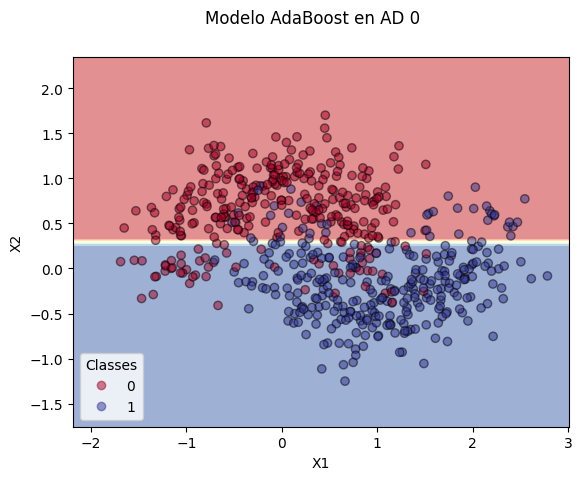

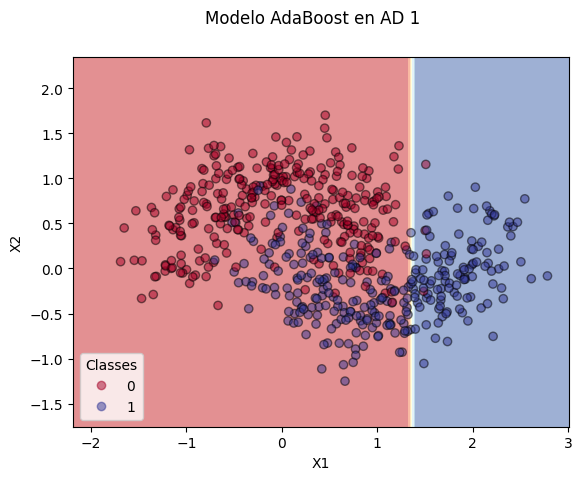

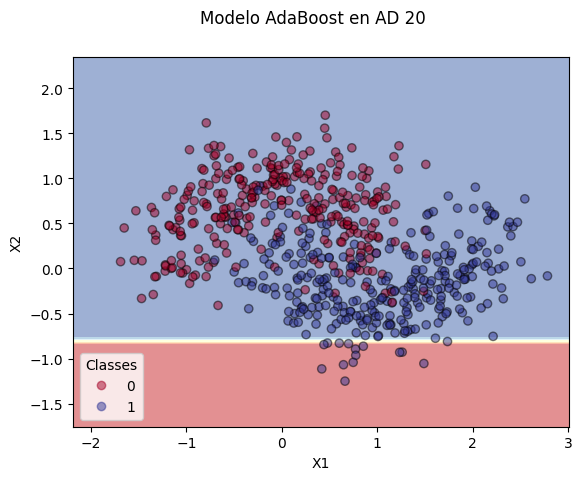

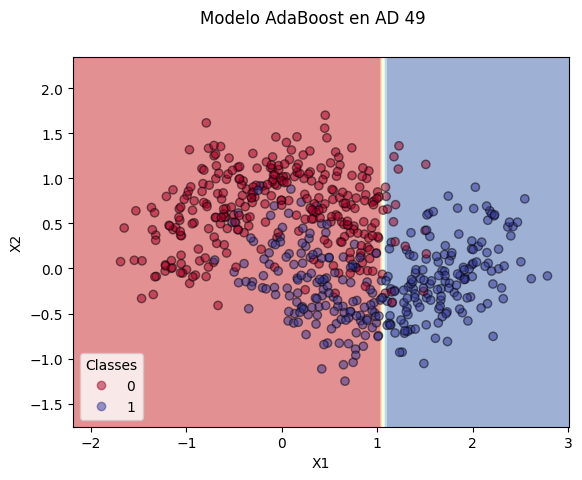

In [ ]:
n_estimators = 50
learning_rate = 1.0

for i in [0, 1, 20, 49]:
  ada_model = AdaBoostClassifier(random_state=0, n_estimators=n_estimators)
  ada_model.fit(X_train, y_train)
  pred_train = ada_model.estimators_[i].predict(X_train)
  pred_test = ada_model.estimators_[i].predict(X_train)
  plot_boundaries_test(X_train, y_train, ada_model.estimators_[i], False, X_test, y_test,f"Modelo AdaBoost en AD {i}")

**Efecto de la tasa de aprendizaje y su vinculación con el número de estimadores**

El número de árboles (estimadores) y la tasa de aprendizaje son dos hiperparámetros importantes en *AdaBoost* que están relacionados y afectan el rendimiento del modelo:

* **Tasa de aprendizaje alta y pocos estimadores**: Cuando se utiliza una tasa de aprendizaje alta y un número bajo de estimadores, el ensamblado puede ajustarse rápidamente a los datos de entrenamiento, ya que los modelos base contribuirán significativamente en cada iteración. Sin embargo, esto puede conducir a un sobreajuste, ya que el ensamblado puede volverse demasiado complejo y sensible a ruido en los datos de entrenamiento.

* **Tasa de aprendizaje baja y muchos estimadores**: Por otro lado, cuando se utiliza una tasa de aprendizaje baja y un número alto de estimadores, el ensamblado puede converger lentamente, ya que la contribución de cada modelo base será pequeña en cada iteración. Esto puede requerir más iteraciones para alcanzar un buen rendimiento en los datos de entrenamiento. Sin embargo, una tasa de aprendizaje baja puede ayudar a reducir la posibilidad de sobreajuste y hacer que el ensamblado sea más robusto a ruido en los datos.

En general, una tasa de aprendizaje alta puede requerir menos estimadores para alcanzar un buen rendimiento en los datos de entrenamiento, pero puede ser más propensa al sobreajuste. Por otro lado, una tasa de aprendizaje baja puede requerir más estimadores para alcanzar el mismo nivel de rendimiento, pero puede ser más robusta a ruido en los datos. Por lo tanto, es importante encontrar un equilibrio adecuado entre la tasa de aprendizaje y el número de estimadores en *AdaBoost*, y esto puede variar según el problema específico y los datos de entrenamiento utilizados. La elección adecuada del número de árboles y de la tasa de aprendizaje depende del conjunto de datos específico y los objetivos del modelo, y generalmente requiere experimentación y ajuste iterativo para encontrar la combinación óptima de hiperparámetros.

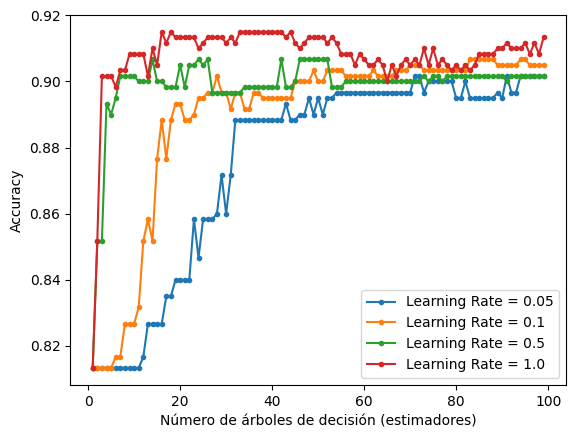

In [ ]:
min = 1
max = 100

for learning_rate in [0.05, 0.1, 0.5, 1.0]:
  accuracy = []
  for n_estimators in range (min, max): 
    gb_model = AdaBoostClassifier(random_state=0, n_estimators=n_estimators, learning_rate=learning_rate)
    gb_model.fit(X_train, y_train)
    accuracy.append(gb_model.score(X_test, y_test))
  plt.plot(range(min,max), accuracy, marker='.', linestyle='-', label="Learning Rate = " + str(learning_rate))
plt.xlabel('Número de árboles de decisión (estimadores)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
  

# **3. AdaBoost *vs.* Gradient Boosting**

*AdaBoost* y *Gradient Boosting* son dos algoritmos ensamblados populares utilizados en aprendizaje automático, pero difieren en algunos aspectos clave:

* **Construcción del ensamble**: En *AdaBoost*, se utiliza un enfoque secuencial en el que los modelos base se construyen iterativamente, y se actualizan los pesos de las instancias en cada iteración para dar mayor importancia a las instancias clasificadas incorrectamente. En *Gradient Boosting*, también se utiliza un enfoque secuencial, pero en lugar de actualizar los pesos de las instancias, se ajusta el modelo base en cada iteración para minimizar el gradiente del error de clasificación o de la función de pérdida.

* **Función de pérdida**: En *AdaBoost*, se utiliza una función de pérdida exponencial para actualizar los pesos de las instancias y construir el ensamble. En *Gradient Boosting*, se puede utilizar una variedad de funciones de pérdida, como el error cuadrático medio (MSE), la entropía cruzada o la *deviance*, dependiendo del problema de aprendizaje y el objetivo de optimización.

* **Modelos base**: En *AdaBoost*, se suelen clasificadores débiles o *stumps*, que son árboles de decisión simples con una sola división, aunque también se pueden utilizar otros modelos base. En *Gradient Boosting*, se pueden utilizar diferentes tipos de modelos base, como árboles de decisión, regresión lineal, regresión logística o cualquier otro algoritmo de aprendizaje supervisado. En el caso de los árboles de decisión, también suelen ser de poca profundidad, aunque generalmente mayor de uno.

* **Manejo de los errores de clasificación**: En *AdaBoost*, se ponderan más las instancias clasificadas incorrectamente en cada iteración para darles mayor importancia en la construcción del ensamblado. En *Gradient Boosting*, se ajusta el modelo base en cada iteración para minimizar el gradiente del error de clasificación, lo que implica que se da mayor importancia a las instancias clasificadas incorrectamente en el ajuste del modelo.

* **Regularización**: *AdaBoost* no incorpora regularización en la construcción del ensamblado, lo que puede hacer que sea más susceptible al sobreajuste. En cambio, *Gradient Boosting* permite incorporar regularización mediante hiperparámetros como la tasa de aprendizaje (*learning rate*) y la profundidad máxima de los árboles base, lo que puede ayudar a mejorar la capacidad de generalización del modelo.

* **Paralelización**: *AdaBoost* no se puede paralelizar fácilmente, ya que la construcción del ensamblado se realiza de forma secuencial. Por otro lado, *Gradient Boosting* se puede paralelizar para acelerar el proceso de entrenamiento, ya que las actualizaciones del modelo base se pueden realizar de forma independiente en cada iteración.

* **Interpretación del modelo**: Los ensamblados construidos con *AdaBoost* suelen ser más interpretables, ya que se utilizan clasificadores débiles como *stumps* que son árboles de decisión simples, por lo que más fácilmente interpretables. En cambio, los ensamblados construidos con *Gradient Boosting* suelen ser más complejos y difíciles de interpretar debido a la mayor complejidad de los modelos base utilizados.



# **4. Ventajas y Desventajas**
**Ventajas**:

* **Mejora de la precisión**: *AdaBoost* combina las predicciones de varios modelos base, lo que puede llevar a una mayor precisión en comparación con los modelos base individuales.

* **Adaptabilidad**: *AdaBoost* es un algoritmo adaptativo que ajusta su enfoque a las instancias difíciles de clasificar durante el proceso de entrenamiento, lo que puede mejorar su capacidad para manejar datos desequilibrados o ruidosos.

* **Reducción del riesgo de sobreajuste**: *AdaBoost* tiende a ser menos propenso al sobreajuste en comparación con los modelos base individuales, lo que lo hace más robusto y generalizable.

* **Versatilidad**: *AdaBoost* puede utilizarse con diferentes modelos base, lo que le permite adaptarse a una amplia gama de problemas de clasificación.

* **Fácil implementación**: La implementación de *AdaBoost* es relativamente sencilla y puede integrarse con otros algoritmos de aprendizaje automático.

**Desventajas**:

* **Sensibilidad al ruido**: *AdaBoost* puede ser sensible a datos ruidosos o atípicos en el conjunto de entrenamiento, lo que puede afectar negativamente su rendimiento.

* **Necesidad de ajustar hiperparámetros**: *AdaBoost* tiene hiperparámetros que necesitan ser ajustados, como el número de iteraciones o la tasa de aprendizaje, lo que puede requerir una selección cuidadosa y ajuste para obtener el mejor rendimiento.

* **Posible riesgo de sobreajuste en conjuntos de datos pequeños**: En conjuntos de datos pequeños, *AdaBoost* puede tener un mayor riesgo de sobreajuste, ya que los modelos base pueden memorizar los datos de entrenamiento.

* **Sensibilidad al desequilibrio de clases**: *AdaBoost* puede verse afectado por el desequilibrio de clases en el conjunto de datos, lo que puede requerir técnicas de muestreo o ponderación para abordar este problema.

* **Mayor costo computacional**: El proceso iterativo de ajuste de modelos base ponderados puede tener un mayor costo computacional en comparación con algunos otros algoritmos de aprendizaje automático.

# Actividad guiada: Estimación de Precios de Viviendas en California.

Estamos interesados en desarrollar un regresor que nos permita estimar el precio de las viviendas en California a partir de una serie de descriptores. Para ello, utilizaremos el dataset "[California Housing](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)" disponible en *SKLearn*. 

El conjunto de datos contiene 20.640 instancias, respondiendo a los siguiente 8 atributos numéricos, y cuya variable objetivo, como hemos dicho, es el precio de la vivienda:

* Ingresos medios en el grupo de bloques (*MedInc*)
* Edad media del edificio en el grupo de bloques (*HouseAge*)
* Media de número de habitaciones por hogar (*AveRooms*)
* Media de número de dormitorios por hogar (*AveBedrms*)
* Población del grupo de bloques (*Population*)
* Media de número de miembros por hogar (*AveOccup*)
* Latitud del grupo de bloques (*Latitude*)
* Longitud del grupo de bloques (*Longitude*)




## Solución 

[*A continuación, haz clic para conocer la solución.*]

Antes de comenzar, repasemos cuales serían las urls de la librería Scikit-Learn para trabajar con AdaBoost: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

En este ejemplo vamos a trabajar con un regresor, por lo que visitaremos la segunda para informarnos de las diferentes posibilidades. Y como podemos ver, el primer parámetro que aparece (*base_estimator*) permite decidir el algoritmo base a utilizar en el ensamblado, dando por defecto los árboles de decisión.

###**Preparación del Entorno**

Cargamos las librerías necesarias para manipular y preparar los datos y construir el modelo.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### **Lectura de Datos**

Vamos a utilizar los datasets de SKLearn para descargar el conjunto de datos *California Housing*:


In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

In [3]:
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Inspeccionemos en detalle el número de características, instancias, clases, etc.:

In [5]:
print("Nº características: ", len(data.feature_names))
print("Características: ", data.feature_names)
print()
print("Nº clases: ", len(data.target_names))
print("Clases: ", data.target_names)
print()
print("Nº de instancias: ", len(data.data))
print("Nº de instancias por clase:")
for c in range(len(data.target_names)):
  print("\tClase '", data.target_names[c], "': ", len(data.target[data.target==c]))

Nº características:  8
Características:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Nº clases:  1
Clases:  ['MedHouseVal']

Nº de instancias:  20640
Nº de instancias por clase:
	Clase ' MedHouseVal ':  0


### **Preparación de los Datos**

Construimos el *dataframe* necesario para el algoritmo de aprendizaje a partir de la descarga desde scklearn, así como realizamos la partición entrenamiento/evaluación:

In [14]:
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["MedHouseVal"])
df_all = pd.concat([df_features, df_target],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_target.values, 
                                                    random_state=42, test_size=0.3)


### **Entrenamiento del Modelo**

Aquí entrenamos el modelo Gradient Boosting eligiendo el valor deseado de profundidad de los árboles (*max_depth*), número de estimadores (*n_estimators*) y tasa de aprendizaje (*learning_rate*).

Te recomiendo probar con diferentes valores de estos parámetros, así como realizar búsqueda *grid* para encontrar la mejor combinación de los mismos.


In [17]:
max_depth = 2
n_estimators = 100
learning_rate = 0.8

ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth), random_state=0, n_estimators=n_estimators, learning_rate=learning_rate)
ada_model.fit(X_train, y_train)

pred_train = ada_model.predict(X_train)
pred_test = ada_model.predict(X_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*ada_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*ada_model.score(X_test, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión sobre los datos de entrenamiento: 46.24
Precisión sobre los datos de test: 46.09


### **Importancia de las Variables**

A continuación visualizamos la importancia de las variables para saber cuáles son las que más contribuyen a realizar un correcto *forecasting* de la temperatura:

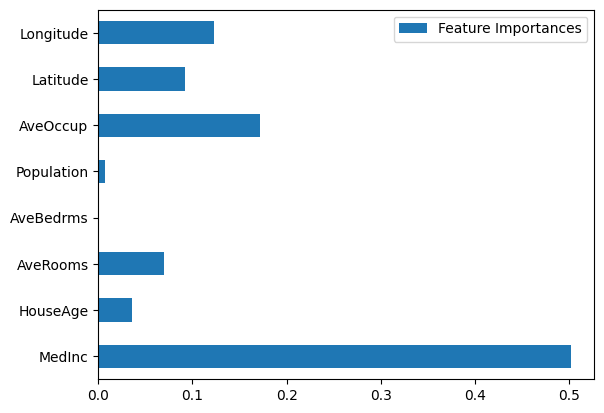

In [18]:
df_imp = pd.DataFrame(ada_model.feature_importances_.reshape(1,-1), columns=df_features.columns, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

Visualizamos la variable a predecir (*MedHouseVal*) en función de parejas de variables, seleccionando las que mayor importancia tienen en la predicción (se recomienda modificar las parejas y visualizar los resultados).

<Axes: xlabel='AveRooms', ylabel='AveOccup'>

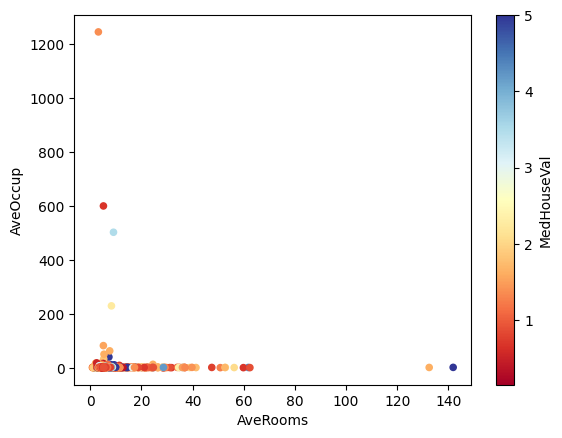

In [23]:
df_all.plot.scatter(x="AveRooms", y="AveOccup", c="MedHouseVal", cmap=plt.cm.RdYlBu)

### **Evaluación del Modelo**

Realizamos una evaluación del modelo en base a cuatro métricas de regresión: *MSA*, *MSE*, *RMSE*, y $r^2$:

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)

# Imprimir las métricas de evaluación
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 0.711
Mean Squared Error (MSE): 0.708
Root Mean Squared Error (RMSE): 0.841
R-squared (R2): 0.461


### **Optimización del Modelo**

Ahora vamos a calcular el MSE de cada una de las predicciones de los árboles de decisión:

In [35]:
errors_test = [mean_squared_error(y_test, y_pred) for y_pred in ada_model.staged_predict(X_test)]
errors_train = [mean_squared_error(y_train, y_pred) for y_pred in ada_model.staged_predict(X_train)]
errors_test

[0.7486724062324419,
 0.7486724062324419,
 0.7148448537322393,
 0.7084233933273617,
 0.7034604112459484,
 0.6947198426476421,
 0.7023937236146385,
 0.6785976494202736,
 0.6842031508842019,
 0.6634580106808545,
 0.6741607986577177,
 0.6604987739615664,
 0.674549906081937,
 0.6689210458986243,
 0.6804913507537017,
 0.6833258161222051,
 0.6789037025283277,
 0.6842075468242987,
 0.687219253198934,
 0.6920857747981153,
 0.6921946906273418,
 0.7141287599688818,
 0.715548868668062,
 0.7095353964083588,
 0.707580199293257]

Visualizamos la evolución del número de errores en entrenamiento y evaluación según el número de estimadores:

<Axes: xlabel='n_trees'>

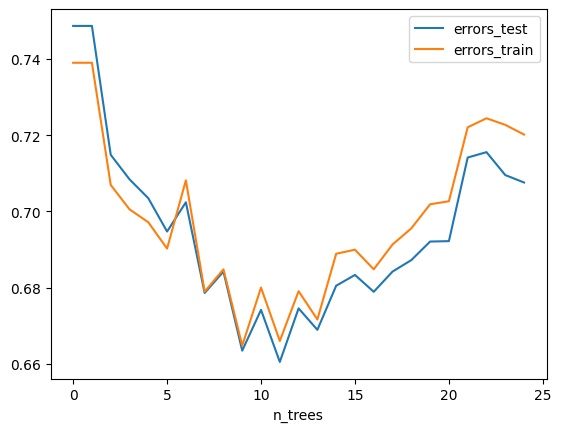

In [34]:
d = pd.DataFrame({"Estimadores":list(range(len(errors_train))), "MSE en Evaluación":errors_test, "MSE en Entrenamiento":errors_train})
d.set_index("n_trees").plot()

Un MSE menor indica menor error, por lo tanto, el mejor número posible de árboles de decisión. Utilizamos esta variable para optimizar el modelo:

In [27]:
best_n_AD = np.argmin(errors_test)
best_n_AD

11

In [28]:
max_depth = 2
n_estimators = best_n_AD
learning_rate = 0.8

best_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth), random_state=0, n_estimators=n_estimators, learning_rate=learning_rate)
best_model.fit(X_train, y_train)
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*best_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*best_model.score(X_test, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión sobre los datos de entrenamiento: 49.24
Precisión sobre los datos de test: 48.64


Repetimos con otra medida, $r^2$, y comprobamos su efecto:

In [36]:
from sklearn.metrics import r2_score
r2_test = [r2_score(y_test, y_pred) for y_pred in ada_model.staged_predict(X_test)]
r2_train = [r2_score(y_train, y_pred) for y_pred in ada_model.staged_predict(X_train)]
r2_test

[0.42960035904776006,
 0.42960035904776006,
 0.4553729448139543,
 0.4602653365714702,
 0.46404654070524676,
 0.47070581804562794,
 0.4648592302565676,
 0.48298901848376263,
 0.4787182907318581,
 0.4945236288543632,
 0.4863693729096138,
 0.4967782165059489,
 0.48607291916934114,
 0.4903614434969429,
 0.4815462425090289,
 0.4793867158388502,
 0.4827558422888165,
 0.47871494154651084,
 0.47642037823625016,
 0.4727126655574454,
 0.4726296846042706,
 0.45591852339025407,
 0.4548365688726542,
 0.45941812201827137,
 0.46090775049016497]

Visualizamos la evolución del número de errores en entrenamiento y evaluación según el número de estimadores:

<Axes: xlabel='Estimadores'>

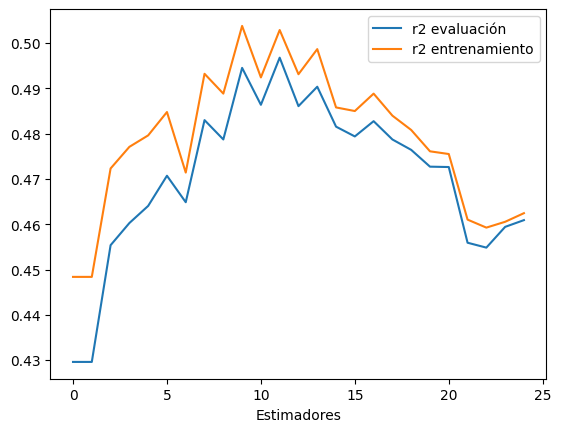

In [38]:
d = pd.DataFrame({"Estimadores":list(range(len(r2_train))), "r2 evaluación":r2_test, "r2 entrenamiento":r2_train})
d.set_index("Estimadores").plot()

Un $r^2$ mayor indica menor error, por lo tanto, el mejor número posible de árboles de decisión. Utilizamos esta variable para optimizar el modelo:

In [41]:
r2_test

[0.42960035904776006,
 0.42960035904776006,
 0.4553729448139543,
 0.4602653365714702,
 0.46404654070524676,
 0.47070581804562794,
 0.4648592302565676,
 0.48298901848376263,
 0.4787182907318581,
 0.4945236288543632,
 0.4863693729096138,
 0.4967782165059489,
 0.48607291916934114,
 0.4903614434969429,
 0.4815462425090289,
 0.4793867158388502,
 0.4827558422888165,
 0.47871494154651084,
 0.47642037823625016,
 0.4727126655574454,
 0.4726296846042706,
 0.45591852339025407,
 0.4548365688726542,
 0.45941812201827137,
 0.46090775049016497]

In [42]:
best_n_AD = np.argmax(r2_test)
best_n_AD

11

In [43]:
max_depth = 2
n_estimators = best_n_AD
learning_rate = 0.8

best_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth), random_state=0, n_estimators=n_estimators, learning_rate=learning_rate)
best_model.fit(X_train, y_train)
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*best_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*best_model.score(X_test, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión sobre los datos de entrenamiento: 49.24
Precisión sobre los datos de test: 48.64


<br/>
<mark>PREGUNTA</mark>
<hr/>

¿Hay variación en el número de estimadores dependiendo de la métrica de evaluación utilizada?

# **IDEAS CLAVE**
<br>
<hr>
<p> <h1> <center> <strong> AdaBoost </center> </strong> </h1> </p>
<hr>
<br>


* *AdaBoost* es una técnica de **ensamblado** de modelos que combina clasificadores débiles (**weak learners**) para crear un clasificador fuerte.


* El enfoque de *AdaBoost* se basa en **ponderación**, asignando pesos a los ejemplos de entrenamiento, dándole **mayor importancia a los ejemplos mal clasificados** en cada iteración.

* *AdaBoost* construye un conjunto de clasificadores débiles de forma **iterativa**, donde cada clasificador se entrena en base a los errores del clasificador anterior.

* Utiliza clasificadores débiles, como **stumps** (árboles de decisión con una sola división), como base para construir un clasificador fuerte.

* *AdaBoost* asigna **pesos** a los clasificadores débiles en función de su rendimiento en el entrenamiento, y los combina mediante una **votación ponderada** para obtener la predicción final.

* Puede **mejorar la precisión** de clasificación en comparación con un solo clasificador débil, al combinar varios clasificadores débiles en un clasificador fuerte.

* *AdaBoost* puede ser **sensible a datos ruidosos** o desequilibrados, ya que asigna pesos a los ejemplos de entrenamiento en función de su rendimiento, lo que puede llevar a la **sobreponderación** de ejemplos ruidosos o mal clasificados.

* Utiliza la técnica de ponderación para **regularizar** el modelo, dándole más importancia a los ejemplos difíciles de clasificar y menos importancia a los ejemplos fáciles.

* Permite ajustar la **tasa de aprendizaje** que controla la contribución de cada clasificador débil en el ensamblaje final, lo que puede afectar el rendimiento del modelo.

* **No requiere ajuste de hiperparámetros** complicados, lo que lo hace relativamente fácil de usar en la práctica.

* *AdaBoost* se puede aplicar a problemas de *clasificación* binaria y multiclase, así como a problemas de *regresión*.

* En ***Python***, existen varias bibliotecas populares como ***Scikit-Learn*** que implementan el algoritmo AdaBoost tanto para clasificación como para regresión. Otras bibliotecas populares serían ***XGBoost***, una biblioteca optimizada para gradient boosting y AdaBoost, y ***LightGBM***, otra biblioteca optimizada para gradient boosting que también ofrece soporte para AdaBoost. También en ***R*** existen librerías especializadas como ***adabag***, ***xgboost*** y ***gbm***.